In [2]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess

## Autoregression
A regression model, such as linear regression, models an output value based on a linear combination of input values.

For example:

yhat = b0 + b1*X1    
Where yhat is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an input value.

This technique can be used on time series where input variables are taken as observations at previous time steps, called lag variables.

For example, we can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as follows:

X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)    
Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

## Mathematical Expression for AR(p) Model

We will begin with the mathematical realization of AR(p) model. A stationary time series with mean $0$ is said to be generated by an AR(p) process if: 

>$\newcommand{\line}{\rule{4cm}{0.4pt}}
\begin{align*}
X_t 
&= \phi_1 X_{t-1}+ \phi_2 X_{t-2} + .... + \phi_p X_{t-p}+ Z_t \line (1) \\
&=  \sum_{i=1} ^p {\phi_i X_{t-i}} + Z_t
\end{align*}
$

where

*   $\phi_1,\phi_2, ..., \phi_p$ are the model parameters of the AR process.

*   $Z_t \overset{iid} {\sim} N(0, \sigma^2)$ is Gaussian white noise at time $t$.

*   $p$ is the order of the AR process. 



In [5]:
# reading dataset
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)

In [6]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


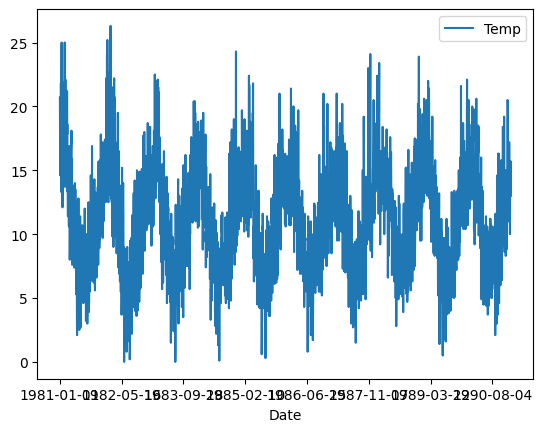

In [15]:
series.plot()
plt.show()

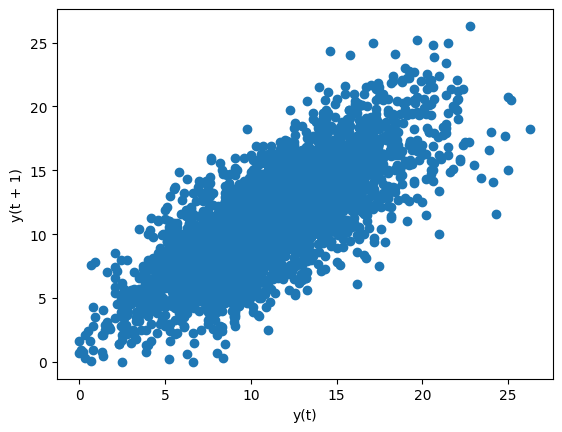

In [17]:
# check for auto correlation
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

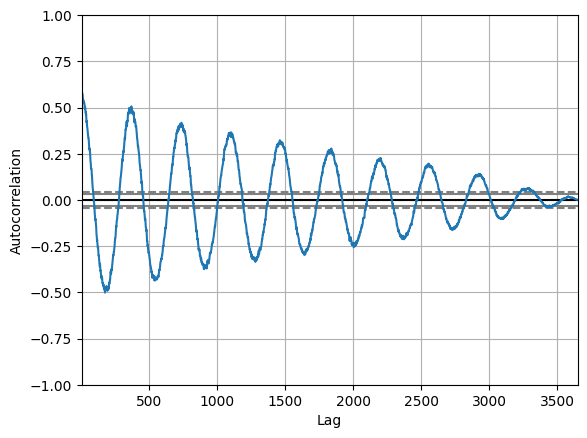

In [19]:
# plotting Autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

D:\AIMLDL\venv_ai\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


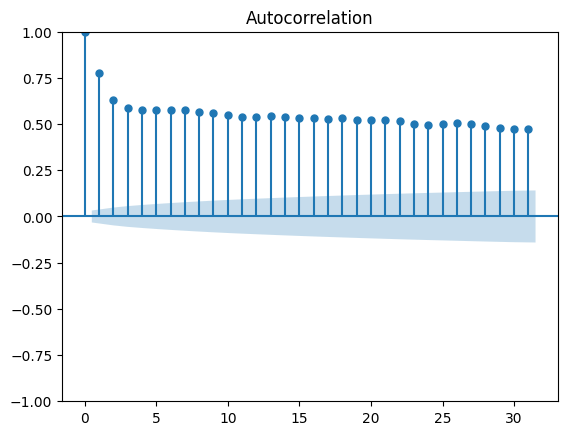

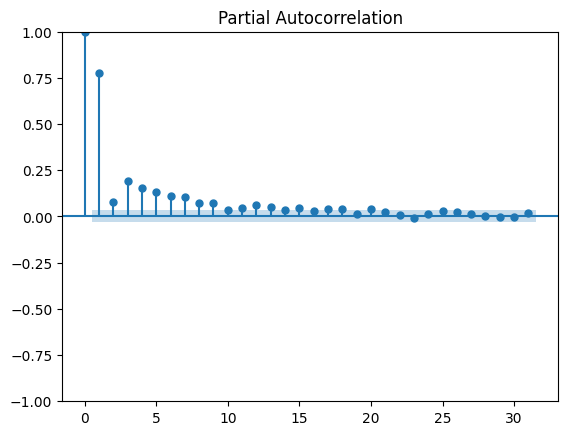

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(series, lags=31)
plot_pacf(series, lags=31)
plt.show()

In [26]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


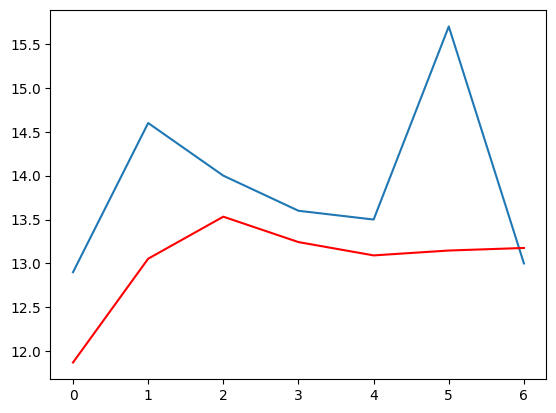

In [29]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()